<a href="https://colab.research.google.com/github/sonika1520/caption-generation-through-facial-expression-analysis/blob/main/captiongeneration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **to import dataset using kaggle**

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sonikagoud","key":"7d55d3dab838260194c6a8fc73ddc331"}'}

In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                             title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
akshaydattatraykhare/diabetes-dataset                           Diabetes Dataset                                      9KB  2022-10-06 08:55:25           3048         95  1.0              
whenamancodes/covid-19-coronavirus-pandemic-dataset             COVID -19 Coronavirus Pandemic Dataset               11KB  2022-09-30 04:05:11           2602         75  1.0              
thedevastator/a-complete-history-of-nobel-prize-winners         Nobel Prize Winners                                   1MB  2022-10-08 00:09:57            613         23  1.0              
thedevastator/fast-food-restaurants-in-the-united-states    

In [ ]:
!kaggle datasets download -d jonathanoheix/face-expression-recognition-dataset

 86% 104M/121M [00:00<00:00, 190MB/s] 
100% 121M/121M [00:00<00:00, 207MB/s]


In [ ]:
!unzip face-expression-recognition-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: images/validation/fear/8797.jpg  
  inflating: images/validation/fear/8818.jpg  
  inflating: images/validation/fear/886.jpg  
  inflating: images/validation/fear/9037.jpg  
  inflating: images/validation/fear/9040.jpg  
  inflating: images/validation/fear/9101.jpg  
  inflating: images/validation/fear/911.jpg  
  inflating: images/validation/fear/9179.jpg  
  inflating: images/validation/fear/9205.jpg  
  inflating: images/validation/fear/9232.jpg  
  inflating: images/validation/fear/9251.jpg  
  inflating: images/validation/fear/9261.jpg  
  inflating: images/validation/fear/9281.jpg  
  inflating: images/validation/fear/9302.jpg  
  inflating: images/validation/fear/9333.jpg  
  inflating: images/validation/fear/9369.jpg  
  inflating: images/validation/fear/9370.jpg  
  inflating: images/validation/fear/9474.jpg  
  inflating: images/validation/fear/949.jpg  
  inflating: images/validation/fear/9602.jpg  
  inflating:

In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os,cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

import keras

from keras.utils import np_utils
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
from keras.models import Sequential
from keras.layers import Dense , Activation , Dropout ,Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.metrics import categorical_accuracy
from keras.models import model_from_json
from keras.callbacks import ModelCheckpoint
from keras.optimizers import *
from tensorflow.keras.layers import BatchNormalization
import os




In [ ]:
train_path='/content/images/newnew/train'
test_path='/content/images/newnew/validation'

# **importinglibraries**

In [ ]:
!pip install tensorflow==2.7.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3021, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.7/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2815, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/cli/base_command.py", line 180, in _main
    status = self.run(options, args)
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/cli/req_command.py", line 199, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/commands/install.py", line 385, in run
    conflicts = self

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten,MaxPool2D,Conv2D,Dropout,MaxPooling2D,BatchNormalization
from tensorflow.keras.preprocessing import image_dataset_from_directory
from keras.preprocessing.image import ImageDataGenerator
from keras import regularizers

In [ ]:
train_datagen=ImageDataGenerator(rescale=1/255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1/255)

In [ ]:
train_set=train_datagen.flow_from_directory(train_path,
                                             target_size=(72,72),
                                             batch_size=32,
                                             color_mode='grayscale',
                                             class_mode='categorical')
test_set=test_datagen.flow_from_directory(test_path,
                                             target_size=(72,72),
                                             batch_size=32,
                                             color_mode='grayscale',
                                             class_mode='categorical')

Found 23403 images belonging to 5 classes.
Found 5739 images belonging to 5 classes.


In [ ]:
train_set.class_indices

{'angry': 0, 'fear': 1, 'happy': 2, 'sad': 3, 'surprise': 4}

In [ ]:
train_sample=next(train_set)
print(train_sample[0].shape)

(32, 72, 72, 1)


# **model training**

In [ ]:
from tensorflow.keras.optimizers import Adam
#Initialising the CNN
model = tensorflow.keras.models.Sequential()   

model.add(Conv2D(32, kernel_size=(2, 2), padding='same', activation='relu', input_shape =(72,72,1)))
model.add(Conv2D(64, kernel_size=(2, 2), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.30))

model.add(Conv2D(128, kernel_size=(2, 2), activation='relu', padding='same'))
model.add(Conv2D(256, kernel_size=(2, 2), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.30))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.30))
    
model.add(Dense(5, activation='softmax'))

#Compliling the model
model.compile(optimizer=Adam(learning_rate=0.0001, decay=1e-6), 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 72, 72, 32)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        8256      
                                                                 
 batch_normalization (BatchN  (None, 72, 72, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 36, 36, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 36, 36, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 36, 36, 128)       3

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

In [ ]:
earlystop =tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', 
                          min_delta=0, 
                          patience=15, 
                          verbose=1, 
                          restore_best_weights=True)
                        
reduce_lr = tensorflow.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', 
                              factor=0.5, 
                              patience=6, 
                              verbose=1, 
                              min_delta=0.0001)
checkpoint=tensorflow.keras.callbacks.ModelCheckpoint(
     './checkpoints', 
    verbose=1, 
    save_weights_only=True,
    save_best_only=True,
    period=5
)
callback=[earlystop,reduce_lr,checkpoint]

In [ ]:
history = model.fit(train_set,epochs=5,batch_size=32,validation_data=test_set)

Epoch 1/5
732/732 [==============================] - 37s 50ms/step - loss: 1.1235 - accuracy: 0.5445 - val_loss: 1.1296 - val_accuracy: 0.5520
Epoch 2/5
732/732 [==============================] - 39s 53ms/step - loss: 1.0803 - accuracy: 0.5647 - val_loss: 1.0677 - val_accuracy: 0.5595
Epoch 3/5
732/732 [==============================] - 37s 51ms/step - loss: 1.0345 - accuracy: 0.5797 - val_loss: 1.0703 - val_accuracy: 0.5855
Epoch 4/5
732/732 [==============================] - 37s 50ms/step - loss: 1.0017 - accuracy: 0.5968 - val_loss: 1.0144 - val_accuracy: 0.6018
Epoch 5/5
732/732 [==============================] - 37s 50ms/step - loss: 0.9528 - accuracy: 0.6227 - val_loss: 1.0180 - val_accuracy: 0.6041


In [ ]:
train_loss, train_accu = model.evaluate(train_set)
test_loss, test_accu = model.evaluate(test_set)
print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_accu*100, test_accu*100))

180/180 [==============================] - 3s 14ms/step - loss: 1.0180 - accuracy: 0.6041
final train accuracy = 67.48 , validation accuracy = 60.41


In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Accuracy with epochs')

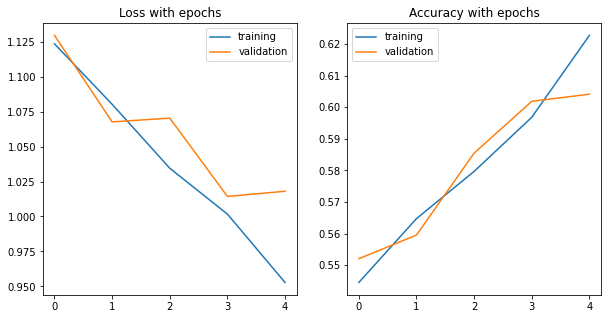

In [ ]:
fig,ax=plt.subplots(1,2,figsize=(10,5))

ax[0].plot(history.history['loss'],label='training')
ax[0].plot(history.history['val_loss'],label='validation')
ax[0].legend()
ax[0].set_title('Loss with epochs')

ax[1].plot(history.history['accuracy'],label='training')
ax[1].plot(history.history['val_accuracy'],label='validation')
ax[1].legend()
ax[1].set_title('Accuracy with epochs')

In [ ]:
model.save('fer_sika.h5')

In [ ]:
import random


In [ ]:
from tensorflow.keras.preprocessing import image

In [ ]:
from google.colab import files
files.upload()

KeyboardInterrupt: ignored

In [ ]:
img_path='/content/angryb.jpg'
test_image=image.load_img(img_path,target_size=(72,72),color_mode='grayscale')

In [ ]:
type(test_image)


PIL.Image.Image

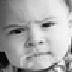

In [ ]:
test_image

In [ ]:
test_image=image.img_to_array(test_image)


In [ ]:
test_image=test_image.reshape(1,72,72,1)

In [ ]:
classes=['Angry','Fear','Happy','Sad','Surprise']

In [ ]:
result=model.predict(test_image)


In [ ]:
result[0]

array([1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
y_pred=np.argmax(result[0])
print(y_pred)
print('the person is ',classes[y_pred])

0
the person is  Angry


In [ ]:
if y_pred==2:
  lines = open('happycap.txt').read().splitlines()
  myline =random.choice(lines)
  print(myline)
elif y_pred==6:
  lines = open('disgustcap.txt').read().splitlines()
  myline =random.choice(lines)
  print(myline)
elif y_pred==0:
  lines = open('angrycap.txt').read().splitlines()
  myline =random.choice(lines)
  print(myline)
elif y_pred==5:
  lines = open('neutralcap.txt').read().splitlines()
  myline =random.choice(lines)
  print(myline)
elif y_pred==1:
  lines = open('fearcap.txt').read().splitlines()
  myline =random.choice(lines)
  print(myline)
elif y_pred==3:
  lines = open('sadcaps.txt').read().splitlines()
  myline =random.choice(lines)
  print(myline)
elif y_pred==4:
  lines = open('surprisecap.txt').read().splitlines()
  myline =random.choice(lines)
  print(myline)


A broken bone can heal. But the wound a word opens can fester forever.
